## 딕셔러니 삽입 순서에 의존할 때는 조심하라

### 덕 타이핑

- 파이썬은 타입 지정언어가 아니기 때문에 객체의 동작이 객체의 실질적인 덕 타입핑에 의존한다.

   - 요구사항 변경 시 어려운 함정에 빠질 수 있다.

```
votes = {
    'otter':1281,
    'polar bear':587,
    'fox':863,
}


def poplulate_ranks(votes, ranks):
    names = list(votes.key())
    names.sort(key=votes.get, reverse=True)
    for i , name in enumerate(names,1):
        ranks[name]=i

def get_winner(ranks):
    return next(iter(ranks))

ranks = {}
populate_ranks(votes, ranks)
print(ranks)
winner= get_winner(ranks)
print(winner)

#{'otter':1, 'fox':2, 'polar bear':3}
otter
```
<br>

- 변경 시 UI 요소에서 결과를 보여줄 때는 등수가 아닌 알파벳 순서로 표시해야한다.

   - collections.abc모듈 사용
   - 알파벳 순서대로 이터레이션 해주는 클래스 새로 정의
   - SortedDict인스턴스를 표준 dict위치에 사용해도 오류가 나지 않는다.
   
```
from collections.abc import MutableMapping

class SortedDict(MutableMapping):
    def __init__(self):
        self.data = {}
    
    def __getitem__(self, key):
        return self.data[key]
    
    def __setitem__(self, key,value):
        self.data[key] =value
    
    def __delitem__(self, key):
        del self.data[key]
    
    def __iter__(self):
        keys= list(self.data.keys())
        keys.sort()
        for key in keys:
        yield key

    def __len__(self):
        return len(self.data)

```

- 실행결과가 요구사항에 맞지 않는다.
   - 득표수가 아닌 알파벳순으로 측정되기 때문이다.

```
sorted_ranks = SortedDict()
populate_ranks(votes, sorted_ranks)
print(sorted_ranks.data)
winner = get_winner(sorted_ranks)
print(winner)

#{'otter':1, 'fox':2, 'polar bear':3}
fox

```
<br>

**해결방법**

- 첫번째(보수적인 접근 방법)

```
def get_winner(ranks):
    for name, rank in ranks.items():
        if rank ==1:
            return name

winner = get_winner(sorted_ranks)
print(winner)
#otter
```
<br>

- 두번쩨

   - ranks의 타입이 우리가 원하는 타입인지 검사하는 코드추가
   - 원하는 타입이 아니면 예외를 던져진다.
   - 보수적인 접근방법보다 실행 성능이 더 좋다


```
def get_winner(ranks):
    if not isinstance(ranks, dict):
        raise TypeError('dict 인스턴스가 필요합니다')
    return next(iter(ranks))

get_winner(sorted_ranks)

```

<br>

- 세 번째

   - 타입 애너테이션을 사용해서 dict인스턴스가 되도록 강제한다.
   - dict와 MutableMapping타입의 차이를 올바로 감지
   - 적절한 타입의 객체를 사용하지 않을 때 오류 발생
   - 정적 타입 안정성과 런타임 성능을 가장 잘 조합

```
#타입 애너테이션을 붙여서 mypy도구를 엄격한 모드로 사용

from typing import DIct, MutableMapping

def populate_ranks(votes: Dict[str, int],
                   ranks: Dict[str, int])->None:
    name = list(votes.keys())
    names.sort(key=votes.get, reverse=True)
    for i,name in enumerate(names,1):
    rank[name] =i

def get_winner(ranks:Dict[str, int]) -> str:
    return next(iter(ranks))


class SortedDict(MutableMapping[str,int]):
   ...

votes = {
    'otter':1281,
    'polar bear':587,
    'fox':863,
}

sorted_ranks = SortedDict()
populate_ranks(votes, sorted_ranks)
print(sorted_ranks.data)
winner = get_winner(sorted_ranks)
print(winner)

```

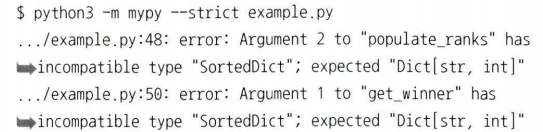